In [10]:
# Notebook for various magnitude plots for DECaLS LRG project
# Everything is messed up, yo.

In [15]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack

In [25]:
# Reading in data for all plots

hdulist = fits.open('http://portal.nersc.gov/project/cosmo/data/legacysurvey/dr3/external/survey-dr3-specObj-dr13.fits')
hdulist2 = fits.open('https://data.sdss.org/sas/dr13/sdss/spectro/redux/specObj-dr13.fits')
tbdata = hdulist[1].data
tbdata2 = hdulist2[1].data

# Put data in arrays
# Object ID from survey file; value -1 for non-matches
objid = []
objid = tbdata.field('OBJID') 

# Only galaxies included
gal_type = []
gal_type = tbdata.field('TYPE') 

# What survey the data comes from
survey = []
survey = tbdata2.field('SURVEY')

# RA
ra = []
ramatch = []
ra = tbdata.field('RA')

# Dec
dec = []
decmatch = []
dec = tbdata.field('DEC')

# Galaxy class
gal_class = []
gal_class = tbdata2.field('CLASS') 

# SPECPRIMARY; set to 1 for primary observation of object, 0 otherwise
spec = []
spec = tbdata2.field('SPECPRIMARY')

# Bitmask of spectroscopic warning values; need set to 0
zwarn_noqso = []
zwarn_noqso = tbdata2.field('ZWARNING_NOQSO')

# Spectroscopic classification for certain redshift?
class_noqso = []
class_noqso = tbdata2.field('CLASS_NOQSO')

# Array for LOWZ targets
targets = []
target_match = []
targets = tbdata2.field('BOSS_TARGET1')
targetVec = np.array(targets)

# Section of code to find LOWZ targets

# Function to find LOWZ targets
def divideBy2(decNumber):
	np.vectorize(decNumber)
	remstack = Stack()
	
	if decNumber == 0: return "0"
	
	while decNumber > 0:
		rem = decNumber % 2
		remstack.push(rem)
		decNumber = decNumber // 2
		
	binString = ""
	while not remstack.isEmpty():
		binString = binString + str(remstack.pop())
			
	return binString

divideBy2Vec = np.vectorize(divideBy2)

a = divideBy2Vec(targets) # gives binary in string form
bin2int = [int(i) for i in a] # converts binary strings to integer
tar = np.array(bin2int) # puts list of integers into numpy array
c = tar % 2 # divide by two again to see if the binary number ends in zero
lowz_tar = np.array(c)

# Number of observations of source from legacy file
obs = []
obsmatch = []
obs = tbdata.field('DECAM_NOBS') 
obsmatch = obs[np.where((lowz_tar == 1) & ((gal_type == 'SIMP') | (gal_type == "DEV") | (gal_type == "EXP")) & (ra >= 241) & (ra <= 246) & (dec >= 6.5) & (dec <= 11.5) & (objid > -1) & (gal_class == 'GALAXY') & (spec == 1 ) & (zwarn_noqso == 0) & (class_noqso == 'GALAXY') & ((survey == 'sdss') | (survey == 'boss')))]

# Put number of observations per filter into arrays that match the filter
uobs = []
gobs = []
robs = []
iobs = []
zobs = []
yobs = []

b = np.array(obsmatch)
uobs = b[:,0]
gobs = b[:,1]
robs = b[:,2]
iobs = b[:,3]
zobs = b[:,4]
yobs = b[:,5]

# Put flux data in an array from legacy file
# Flux has ugrizY, so needs to be divided into 6 arrays
flux =[]
fluxmatch = []

# Flux from DECAM
flux = tbdata.field('DECAM_FLUX')
fluxmatch = flux[np.where((lowz_tar == 1) & ((gal_type == 'SIMP') | (gal_type == "DEV") | (gal_type == "EXP")) & (ra >= 241) & (ra <= 246) & (dec >= 6.5) & (dec <= 11.5) & (objid > -1) & (gal_class == 'GALAXY') & (spec == 1 ) & (zwarn_noqso == 0) & (class_noqso == 'GALAXY') & ((survey == 'sdss') | (survey == 'boss')))]

# Divide flux arrays into 6 arrays
uflux = []
gflux = []
rflux = []
iflux = []
zflux = []
yflux = []

a = np.array(fluxmatch)
uflux = a[:,0]
gflux = a[:,1]
rflux = a[:,2]
iflux = a[:,3]
zflux = a[:,4]
yflux = a[:,5]

# APFLUX for aperture 1.5

flux_ap = tbdata.field('DECAM_APFLUX')
fluxmatch_ap = flux_ap[np.where((lowz_tar == 1) & ((gal_type == 'SIMP') | (gal_type == "DEV") | (gal_type == "EXP")) & (ra >= 241) & (ra <= 246) & (dec >= 6.5) & (dec <= 11.5) & (objid > -1) & (gal_class == 'GALAXY') & (spec == 1 ) & (zwarn_noqso == 0) & (class_noqso == 'GALAXY') & ((survey == 'sdss') | (survey == 'boss')))]

uflux_ap = []
gflux_ap = []
rflux_ap = []
iflux_ap = []
zflux_ap = []
yflux_ap = []

t = np.array(fluxmatch_ap)

flux_u = t[:,0]
flux_g = t[:,1]
flux_r = t[:,2]
flux_i = t[:,3]
flux_z = t[:,4]
flux_y = t[:,5]

# APFLUX for aperture 1.5
uflux_ap = flux_u[:,3]
gflux_ap = flux_g[:,3]
rflux_ap = flux_r[:,3]
iflux_ap = flux_i[:,3]
zflux_ap = flux_z[:,3]
yflux_ap = flux_y[:,3]

# DECAM_DEPTH; 5-sigma point source detection limit
depth = []
depth = tbdata.field('DECAM_DEPTH')
depthmatch = depth[np.where((lowz_tar == 1) & ((gal_type == 'SIMP') | (gal_type == "DEV") | (gal_type == "EXP")) & (ra >= 241) & (ra <= 246) & (dec >= 6.5) & (dec <= 11.5) & (objid > -1) & (gal_class == 'GALAXY') & (spec == 1 ) & (zwarn_noqso == 0) & (class_noqso == 'GALAXY') & ((survey == 'sdss') | (survey == 'boss')))]

udepth = []
gdepth = []
rdepth = []
idepth = []
zdepth = []
ydepth = []

a = np.array(depthmatch)
udepth = a[:,0]
gdepth = a[:,1]
rdepth = a[:,2]
idepth = a[:,3]
zdepth = a[:,4]
ydepth = a[:,5]

In [18]:
# Calculations for magnitudes and color

# Using DECAM_FLUX
gflux_DECAM_FLUX = gflux[np.where((gobs >= 3) & (robs >= 3) & (gflux > 0.) & (rflux > 0.))]
rflux_DECAM_FLUX = rflux[np.where((gobs >= 3) & (robs >= 3) & (rflux > 0.) & (gflux > 0.))]

gmag_DECAM_FLUX = 22.5 - 2.5 * np.log10(gflux_DECAM_FLUX)
rmag_DECAM_FLUX = 22.5 - 2.5 * np.log10(rflux_DECAM_FLUX)

gminusr_DECAM_FLUX = gmag_DECAM_FLUX - rmag_DECAM_FLUX


In [23]:
# Using DECAM_APFLUX

# Finds flux that correspond with at least 3 observations and a flux > 0
gflux_DECAM_APFLUX = gflux_ap[np.where((gobs >= 3) & (robs >= 3) & (gflux_ap > 0.) & (rflux_ap > 0.))]
rflux_DECAM_APFLUX = rflux_ap[np.where((gobs >= 3) & (robs >= 3) & (rflux_ap > 0.) & (gflux_ap > 0.))]

gmag_DECAM_APFLUX = 22.5 - 2.5 * np.log10(gflux_DECAM_APFLUX)
rmag_DECAM_APFLUX = 22.5 - 2.5 * np.log10(rflux_DECAM_APFLUX)

gminusr_DECAM_APFLUX = gmag_DECAM_APFLUX - rmag_DECAM_APFLUX

In [26]:
# Using DECAM_DEPTH to find magnitudes
# magnitude equation given in catalog http://legacysurvey.org/dr3/catalogs/

gmag_DECAM_DEPTH = -2.5*(np.log10(5./np.sqrt(gdepth)) - 9.)
rmag_DECAM_DEPTH = -2.5*(np.log10(5./np.sqrt(rdepth)) - 9.)

gminusr_DECAM_DEPTH = gmag_DECAM_DEPTH - rmag_DECAM_DEPTH

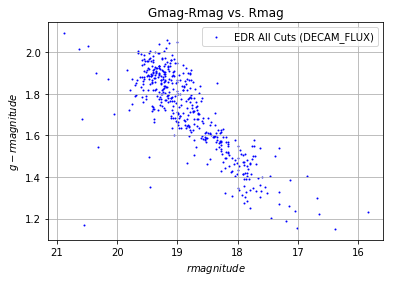

In [20]:
# Plots

# CM diagram for EDR LRGs using DECAM_FLUX
plt.scatter(rmag_DECAM_FLUX, gminusr_DECAM_FLUX, s = 1, color = 'blue', label = 'EDR All Cuts (DECAM_FLUX)')

plt.gca().invert_xaxis()

plt.grid(True)
plt.title('Gmag-Rmag vs. Rmag')
plt.xlabel(r'$r magnitude$')
plt.ylabel(r'$g-r magnitude$')

plt.legend(loc='upper right')

plt.show()

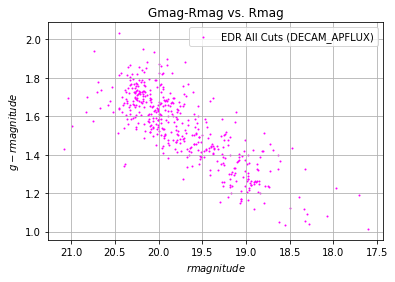

In [24]:
# CM diagram for EDR LRGs using DECAM_APFLUX
plt.scatter(rmag_DECAM_APFLUX, gminusr_DECAM_APFLUX, s = 1, color = 'magenta', label = 'EDR All Cuts (DECAM_APFLUX)')

plt.gca().invert_xaxis()

plt.grid(True)
plt.title('Gmag-Rmag vs. Rmag')
plt.xlabel(r'$r magnitude$')
plt.ylabel(r'$g-r magnitude$')

plt.legend(loc='upper right')

plt.show()

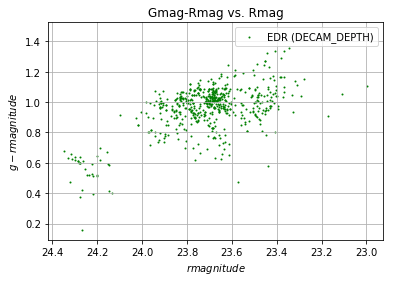

In [32]:
# CM diagram for EDR LRGs using DECAM_DEPTH
# Does not include cuts for number of observations 

# Plot
plt.scatter(rmag_DECAM_DEPTH, gminusr_DECAM_DEPTH, s = 1, color = 'green', label = 'EDR (DECAM_DEPTH)')

plt.gca().invert_xaxis()

plt.grid(True)
plt.title('Gmag-Rmag vs. Rmag')
plt.xlabel(r'$r magnitude$')
plt.ylabel(r'$g-r magnitude$')

plt.legend(loc='upper right')

plt.show()

In [28]:
# Compare magnitude histograms for magnitudes derived from DECAM_FLUX and DECAM_DEPTH
# Magnitudes for g and r filters using DECAM_FLUX

gflux_DECAM_FLUX = gflux[np.where((gobs >= 3) & (gflux > 0.))]
rflux_DECAM_FLUX = rflux[np.where((robs >= 3) & (rflux > 0.))]

gmag_DECAM_FLUX = 22.5 - 2.5 * np.log10(gflux_DECAM_FLUX)
rmag_DECAM_FLUX = 22.5 - 2.5 * np.log10(rflux_DECAM_FLUX)

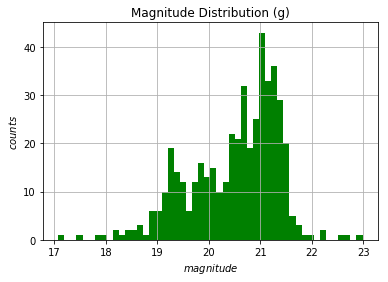

In [30]:
# Magnitude histogram for g using DECAM_FLUX

plt.hist(gmag_DECAM_FLUX, bins = 50, color = 'green', label = 'EDR All Cuts (DECAM_FLUX)')

plt.grid(True)
plt.title('Magnitude Distribution (g)')
plt.xlabel(r'$magnitude$')
plt.ylabel(r'$counts$')

plt.show()

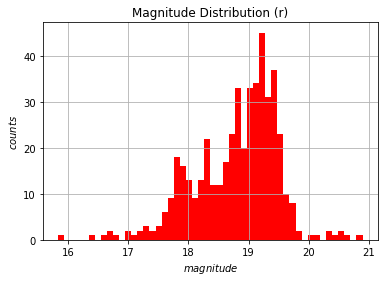

In [36]:
# Magnitude histogram for r using DECAM_FLUX

plt.hist(rmag_DECAM_FLUX, bins = 50, color = 'red', label = 'EDR All Cuts (DECAM_FLUX)')
    
plt.grid(True)
plt.title('Magnitude Distribution (r)')
plt.xlabel(r'$magnitude$')
plt.ylabel(r'$counts$')

plt.show()

In [33]:
# Magnitudes for g and r filters using DECAM_DEPTH

gmag_DECAM_DEPTH = -2.5*(np.log10(5./np.sqrt(gdepth)) - 9.)
rmag_DECAM_DEPTH = -2.5*(np.log10(5./np.sqrt(rdepth)) - 9.)

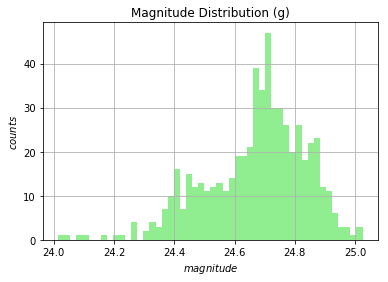

In [35]:
# Magnitude histogram for g using DECAM_DEPTH

plt.hist(gmag_DECAM_DEPTH, bins = 50, color = 'lightgreen', label = 'EDR (DECAM_DEPTH)')

plt.grid(True)
plt.title('Magnitude Distribution (g)')
plt.xlabel(r'$magnitude$')
plt.ylabel(r'$counts$')

plt.show()

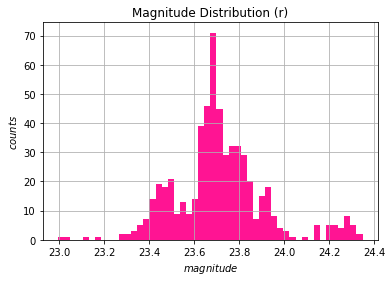

In [39]:
# Magnitude histogram for r using DECAM_DEPTH

plt.hist(rmag_DECAM_DEPTH, bins = 50, color = 'deeppink', label = 'EDR (DECAM_DEPTH)')

plt.grid(True)
plt.title('Magnitude Distribution (r)')
plt.xlabel(r'$magnitude$')
plt.ylabel(r'$counts$')

plt.show()